<a href="https://colab.research.google.com/github/2k177/ML/blob/main/ML_foundation/Linear_algebra_apps/Images_and_Photographs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Load and Manipulate Images for Deep Learning in Python With PIL/Pillow??????????
  * The most popular and de facto standard library in Python for loading and working with image data is Pillow. 
  * Pillow is an updated version of the Python Image Library, or PIL, and supports a range of simple and sophisticated image manipulation functionality. 
  * It is also the basis for simple image support in other Python libraries such as SciPy and Matplotlib.

In [2]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import PIL

### How to Load and Display Images ?

In [10]:
from PIL import Image
#load the image
image = Image.open('/content/sample_data/opera_house.jpg')
# summarize details aboubt image
print("Image object contents...\n")
print(image.format)
print(image.mode) #pixel channel format
print(image.size)

Image object contents...

JPEG
RGB
(150, 150)


In [9]:
print("Printing image.......")
print(image.show()) #technically it open using OS default image view if available.

Printing image.......
None


### How to Convert Images to NumPy Arrays??

Shape of pixel array...
datatype : uint8
Shape: (150, 150, 3)
Display array of pixel as an image 


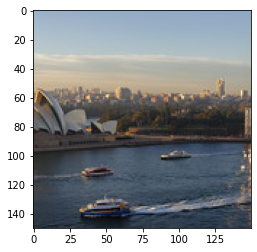

In [13]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
data = image.imread('/content/sample_data/opera_house.jpg')

# summarize shape of the pixel array
print("Shape of pixel array...")
print(f"datatype : {data.dtype}")
print(f"Shape: {data.shape}")

# display the array of pixels as an image
print("Display array of pixel as an image ")
pyplot.imshow(data)
# pyplot.show()

  * The simplest way is to construct a NumPy array and pass in the Image object. The process can be reversed converting a given array of **pixel data** into a **Pillow Image** object using the Image.**fromarray()** function. This can be useful if image data is manipulated as a NumPy array and save it later as a PNG or JPEG file.

In [14]:
from PIL import Image
from numpy import asarray

#load an image
image = Image.open("/content/sample_data/opera_house.jpg")

#convert to numpy array
image_data  = asarray(image)

print(image_data.shape)

(150, 150, 3)


In [16]:
#create a Pillow image using numpy array
image2 = Image.fromarray(image_data)

#summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

None
RGB
(150, 150)


(150, 150, 3)
None
RGB
(150, 150)


In [21]:
# load all images in a directory
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
for filename in listdir('/content/sample_data/'):
  if '.jpg' in filename:
    #load image
    img_data = image.imread('/content/sample_data/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))

> loaded opera_house.jpg (150, 150, 3)


## How to save images to file ?


In [23]:
# example of saving an image in another format
from PIL import Image

# load the image
image = Image.open('/content/sample_data/opera_house.jpg')
# save as PNG format
image.save('opera_house.png', format='PNG')
# load the image again and inspect the format
image2 = Image.open('/content/opera_house.png')
print(image2.format)

PNG


In [25]:
# converting color images (RGB channels) to grayscale (1 channel)

# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open('/content/sample_data/opera_house.jpg')
# convert the image to grayscale
gs_image = image.convert(mode='L')
# save in jpeg format
gs_image.save('/content/sample_data/opera_house_grayscale.jpg')
# load the image again and show it
image2 = Image.open('/content/sample_data/opera_house_grayscale.jpg')
# show the image
image2.show()

## How to Resize Images??
Sometimes it is desirable to thumbnail all images to have the same width or height. This can be achieved with Pillow using the thumbnail() function. The function takes a tuple with the width and height and the image will be resized so that the width and height of the image are equal or smaller than the specified shape.

In [26]:
# create a thumbnail of an image
from PIL import Image
# load the image
image = Image.open('/content/sample_data/opera_house.jpg')

# report the size of the image
print(image.size)

# create a thumbnail and preserve aspect ratio
image.thumbnail((100,100))

# report the size of the thumbnail
print(image.size)

(150, 150)
(100, 100)


In [27]:
# resize image and force a new shape
from PIL import Image
# load the image
image = Image.open('/content/sample_data/opera_house.jpg') 

# report the size of the image
print(image.size)

# resize image and ignore original aspect ratio
img_resized = image.resize((200,200))

# report the size of the thumbnail
print(img_resized.size)

(150, 150)
(200, 200)


## Flip image

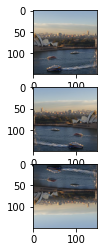

In [37]:

# create flipped versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open('/content/sample_data/opera_house.jpg')
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

# plot all three images using matplotlib
pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)
pyplot.show()

## Rotate Image

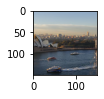

In [38]:
# create rotated versions of an image
from PIL import Image
from matplotlib import pyplot

# load image
image = Image.open('/content/sample_data/opera_house.jpg')

# plot original image
pyplot.subplot(311)
pyplot.imshow(image)

# # rotate 45 degrees
# pyplot.subplot(312)
# pyplot.imshow(image.rotate(45))
# # rotate 90 degrees
# pyplot.subplot(313)
# pyplot.imshow(image.rotate(90))
# pyplot.show()

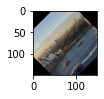

In [39]:
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))

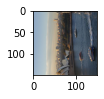

In [40]:
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))

## Cropped image
An image can be cropped: that is, a piece can be cut out to create a new image, using the crop() function.


*   The crop function takes a tuple argument that defines the two x/y coordinates of the box to crop out of the image. For example, if the image is 2,000 by 2,000 pixels, we can clip out a 100 by 100 box in the middle of the image by defining a tuple with the top-left and bottom-right points of (950, 950, 1050, 1050).



In [41]:
# example of cropping an image
from PIL import Image
# load image
image = Image.open('/content/sample_data/opera_house.jpg')
# create a cropped image
cropped = image.crop((100, 100, 200, 200))
# show cropped image
cropped.show()